In [1]:
from UnityEnvWrapper import TennisEnv
from buffer import ReplayBuffer
from maddpg import MADDPG
import torch
import numpy as np
import os
from collections import deque
from ddpg import DDPGAgent
import torch
import torch.nn.functional as F

device = 'cpu'

# Replay Saved Model

In [2]:
# Load saved model
agent0 = DDPGAgent(24, 2, 48)
agent1 = DDPGAgent(24, 2, 48)
agent_file = torch.load('model_dir/episode-2372-17.pt', map_location='cpu')
agent0.actor.load_state_dict(agent_file[0]['actor_params'])
agent1.actor.load_state_dict(agent_file[1]['actor_params'])

In [3]:
env = TennisEnv()
max_t=1000
rwds = []
for ep in range(100):
    reward_this_episode = np.zeros((1, 2))
    obs, obs_full, env_info = env.reset()
    for i in range(max_t):
        obst=torch.tensor(obs, dtype=torch.float)
        action0 = agent0.act(obst[0,:].view(1,-1), 0).squeeze()
        action1 = agent1.act(obst[1,:].view(1,-1), 0).squeeze()
        actions = torch.stack([action0, action1]).detach().numpy()
        next_obs, next_obs_full, rewards, dones, info = env.step(actions)
        reward_this_episode += rewards
        obs = np.copy(next_obs)
        obs_full = np.copy(next_obs_full)
        if np.any(dones):
            break
    rwds.append(max(reward_this_episode[0, 0], reward_this_episode[0, 1]))
    print('\rEpisode:{}, Rwd:{:.3f} vs. {:.3f}, Avg_Max:{}'.format(ep, reward_this_episode[0, 0], reward_this_episode[0, 1],
                                                      np.mean(rwds) 
                                                      ))

env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]
The full state is: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.       

# Show Training History

In [5]:
data = np.load('scores-2372-17.npz')

In [10]:
s=data['avg_max_scores']

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

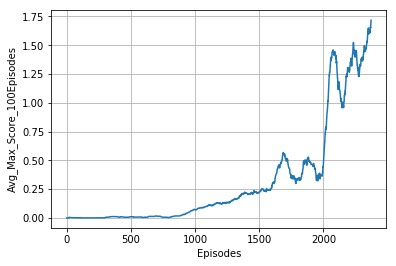

In [12]:
plt.plot(s)
plt.xlabel('Episodes')
plt.ylabel('Avg_Max_Score_100Episodes')
plt.grid()

In [14]:
s.shape

(2373,)

In [15]:
s[-1]

1.7168000255897642